<a href="https://colab.research.google.com/github/sajiaakhter/mec-mini-projects/blob/master/FutureSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download Kaggle Data in Colab**

In [2]:
! pip install -q kaggle


In [3]:
#before running copy kaggle.json using current APi
! mkdir ~/.kaggle    
! cp /kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! ls -al /root/.kaggle/
!kaggle datasets list

**Downloading Future Sales data**

In [ ]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

In [ ]:
#Unzip
! mkdir /content/futureSales
! unzip /content/competitive-data-science-predict-future-sales.zip -d /content/futureSales 

**Exploratory data analysis**

In [7]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [8]:
sales_train = pd.read_csv('/content/futureSales/sales_train.csv') 
sales_train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
items = pd.read_csv('/content/futureSales/items.csv') 
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
item_categories = pd.read_csv('/content/futureSales/item_categories.csv')
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [11]:
shops = pd.read_csv('/content/futureSales/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


**Data Cleaning and preperation**

In [12]:
sales_train.isnull().values.any()
sales = sales_train.dropna()

#drop neg value for item count per day
sales = sales.drop(sales[sales_train["item_cnt_day"] < 0].index, axis=0)

# Transform Date Format
sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)

#add day, month, year
sales['year'] = pd.DatetimeIndex(sales['date']).year
sales['month'] = pd.DatetimeIndex(sales['date']).month
sales['day'] = pd.DatetimeIndex(sales['date']).day
sales["weekday"] = pd.DatetimeIndex(sales['date']).dayofweek
sales['Total_Price'] = sales["item_price"] * sales["item_cnt_day"]

sales.shape


(2928493, 11)

In [13]:
#sales.index = pd.to_datetime(sales['date'],dayfirst=True)
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,weekday,Total_Price
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2,2,999.00
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3,3,899.00
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6,6,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,1,1099.00
5,2013-01-10,0,25,2564,349.00,1.0,2013,1,10,3,349.00


**Exploratory Data Analysis**


# Sales Data


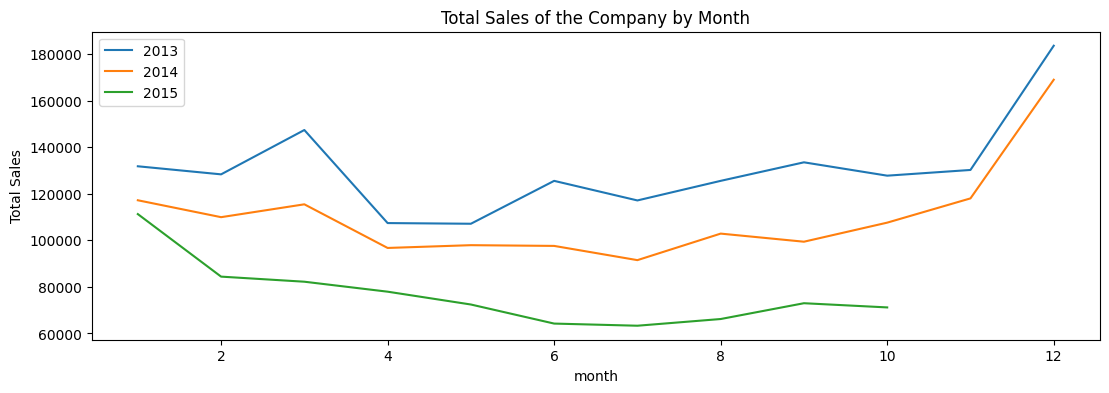

In [14]:
#by month total item sales
item_count_year2013 = sales[sales.year == 2013]
item_count_year2014 = sales[sales.year == 2014]
item_count_year2015 = sales[sales.year == 2015]

sum_item_count_year2013 = item_count_year2013.groupby(["month"])["item_cnt_day"].sum()
sum_item_count_year2014 = item_count_year2014.groupby(["month"])["item_cnt_day"].sum()
sum_item_count_year2015 = item_count_year2015.groupby(["month"])["item_cnt_day"].sum()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Total Sales of the Company by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
sum_item_count_year2013.plot(ax=ax,label=2013)
sum_item_count_year2014.plot(ax=ax,label=2014)
sum_item_count_year2015.plot(ax=ax,label=2015)
plt.legend()

#avg_item_count = pd.DataFrame(df_train.groupby("date")["item_cnt_day"].mean().sort_index()).reset_index()
#sum_total_price = pd.DataFrame(df_train.groupby("date")["total_price_day"].sum().sort_index()).reset_index()
#avg_total_price = pd.DataFrame(df_train.groupby("date")["total_price_day"].mean().sort_index()).reset_index()


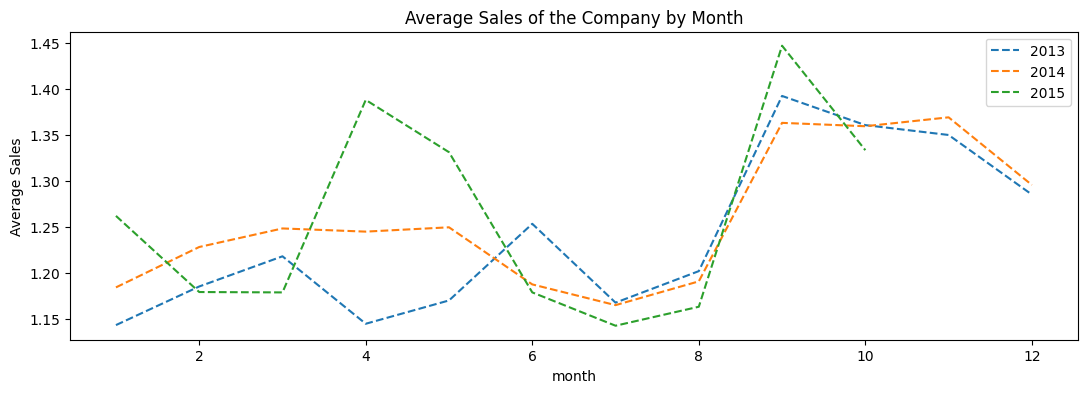

In [15]:
mean_item_count_year2013 = item_count_year2013.groupby(["month"])["item_cnt_day"].mean()
mean_item_count_year2014 = item_count_year2014.groupby(["month"])["item_cnt_day"].mean()
mean_item_count_year2015 = item_count_year2015.groupby(["month"])["item_cnt_day"].mean()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Average Sales of the Company by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
mean_item_count_year2013.plot(ax=ax,label=2013, ls = 'dashed')
mean_item_count_year2014.plot(ax=ax,label=2014, ls = 'dashed')
mean_item_count_year2015.plot(ax=ax,label=2015, ls = 'dashed')
plt.legend()


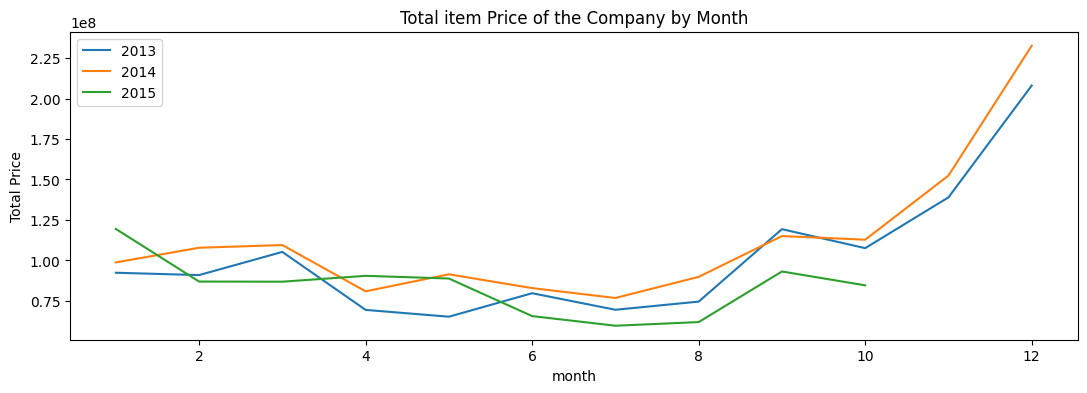

In [16]:
sum_item_pr_year2013 = item_count_year2013.groupby(["month"])["Total_Price"].sum()
sum_item_pr_year2014 = item_count_year2014.groupby(["month"])["Total_Price"].sum()
sum_item_pr_year2015 = item_count_year2015.groupby(["month"])["Total_Price"].sum()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Total item Price of the Company by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
sum_item_pr_year2013.plot(ax=ax,label=2013)
sum_item_pr_year2014.plot(ax=ax,label=2014)
sum_item_pr_year2015.plot(ax=ax,label=2015)
plt.legend()

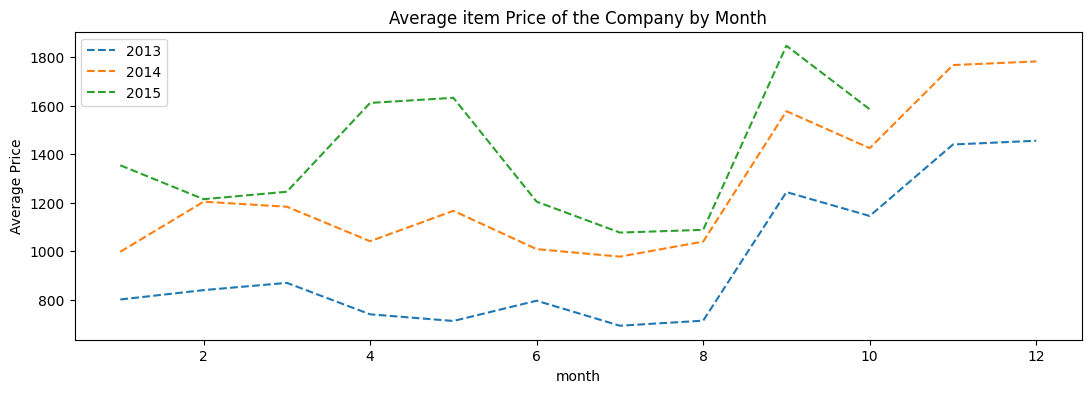

In [17]:
mean_item_pr_year2013 = item_count_year2013.groupby(["month"])["Total_Price"].mean()
mean_item_pr_year2014 = item_count_year2014.groupby(["month"])["Total_Price"].mean()
mean_item_pr_year2015 = item_count_year2015.groupby(["month"])["Total_Price"].mean()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Average item Price of the Company by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
mean_item_pr_year2013.plot(ax=ax,label=2013, ls = 'dashed')
mean_item_pr_year2014.plot(ax=ax,label=2014, ls = 'dashed')
mean_item_pr_year2015.plot(ax=ax,label=2015, ls = 'dashed')
plt.legend()

**Observations**

- We see that in 2015, 'total items sold' is much less for every month compared to 2013 and 2014. However, the total price earned for 2015 is the most in January and April compared to 2013 and 2014. But the average price earned in 2015 is more for every month comparing 2013 and 2014.  

- The most items sold in the year of 2013, then 2014 and the least items sold in 2015.

- In the month of december, total items sold and total price earned increased rapidly. But the average item sold dropped in December from November, which can indicate there might be certain items sold more in December which contributed to big profit.

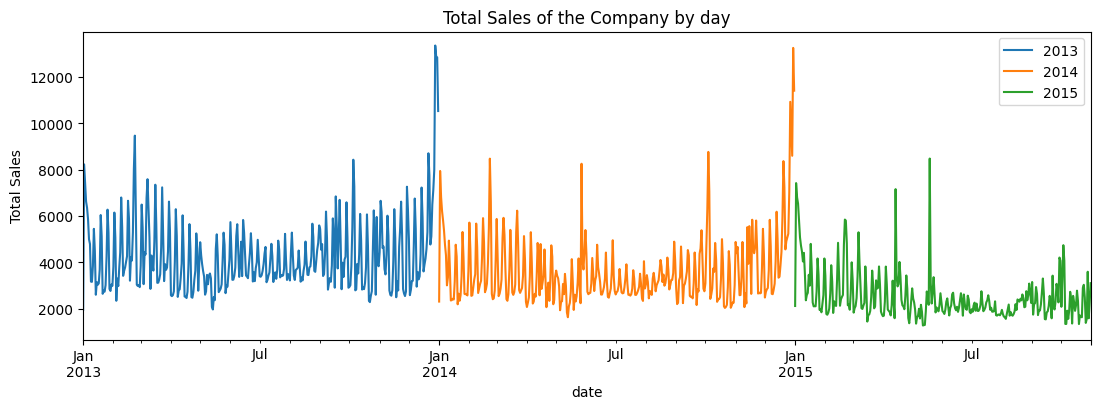

In [18]:
#by day

sum_item_count_year2013_day = item_count_year2013.groupby(["date"])["item_cnt_day"].sum()
sum_item_count_year2014_day = item_count_year2014.groupby(["date"])["item_cnt_day"].sum()
sum_item_count_year2015_day = item_count_year2015.groupby(["date"])["item_cnt_day"].sum()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Total Sales of the Company by day')
plt.ylabel('Total Sales')
sum_item_count_year2013_day.plot(ax=ax,label=2013)
sum_item_count_year2014_day.plot(ax=ax,label=2014)
sum_item_count_year2015_day.plot(ax=ax,label=2015)
plt.legend()


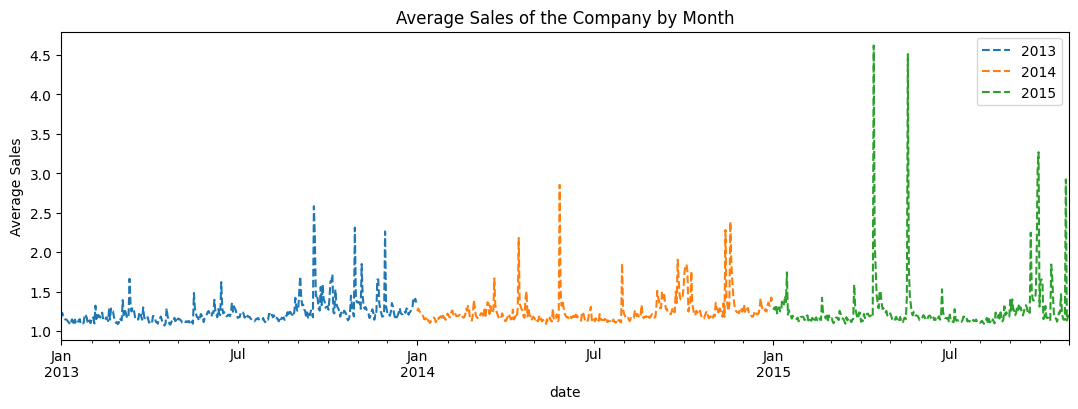

In [19]:
mean_item_count_year2013_day = item_count_year2013.groupby(["date"])["item_cnt_day"].mean()
mean_item_count_year2014_day = item_count_year2014.groupby(["date"])["item_cnt_day"].mean()
mean_item_count_year2015_day = item_count_year2015.groupby(["date"])["item_cnt_day"].mean()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Average Sales of the Company by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
mean_item_count_year2013_day.plot(ax=ax,label=2013, ls = 'dashed')
mean_item_count_year2014_day.plot(ax=ax,label=2014, ls = 'dashed')
mean_item_count_year2015_day.plot(ax=ax,label=2015, ls = 'dashed')
plt.legend()

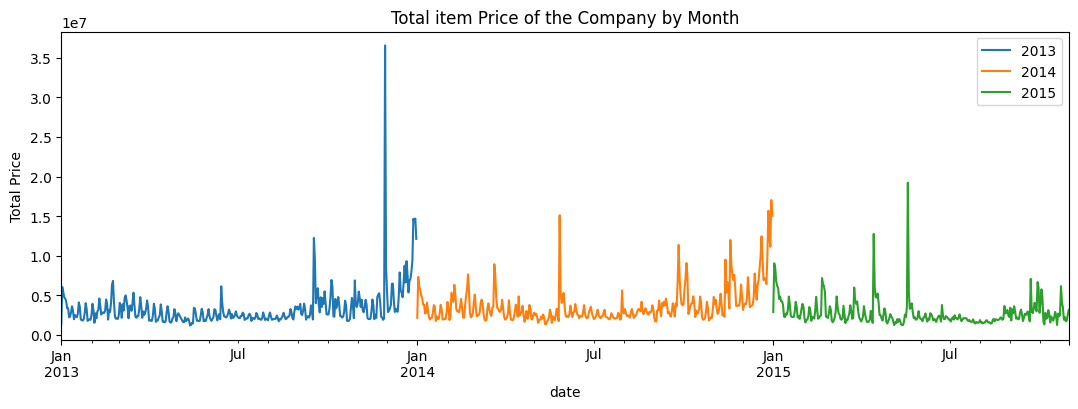

In [20]:
sum_item_pr_year2013_day = item_count_year2013.groupby(["date"])["Total_Price"].sum()
sum_item_pr_year2014_day = item_count_year2014.groupby(["date"])["Total_Price"].sum()
sum_item_pr_year2015_day = item_count_year2015.groupby(["date"])["Total_Price"].sum()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Total item Price of the Company by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
sum_item_pr_year2013_day.plot(ax=ax,label=2013)
sum_item_pr_year2014_day.plot(ax=ax,label=2014)
sum_item_pr_year2015_day.plot(ax=ax,label=2015)
plt.legend()

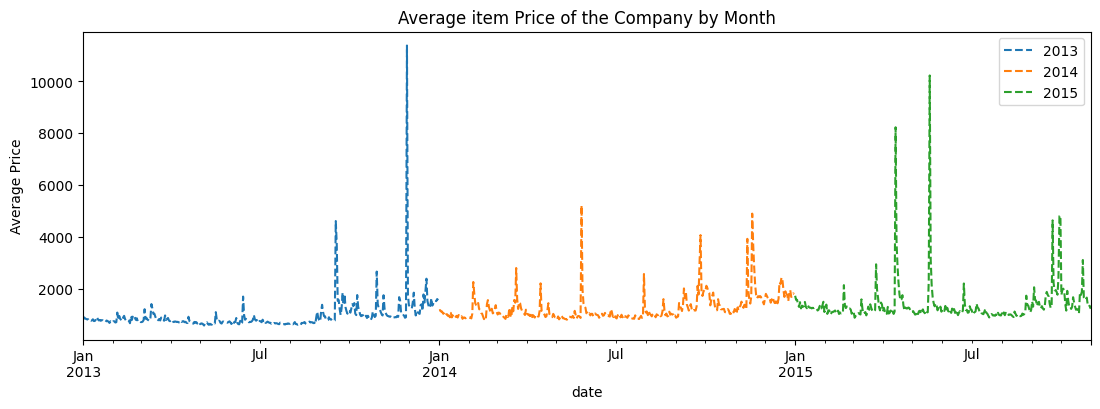

In [21]:
mean_item_pr_year2013_day = item_count_year2013.groupby(["date"])["Total_Price"].mean()
mean_item_pr_year2014_day = item_count_year2014.groupby(["date"])["Total_Price"].mean()
mean_item_pr_year2015_day = item_count_year2015.groupby(["date"])["Total_Price"].mean()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Average item Price of the Company by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
mean_item_pr_year2013_day.plot(ax=ax,label=2013, ls = 'dashed')
mean_item_pr_year2014_day.plot(ax=ax,label=2014, ls = 'dashed')
mean_item_pr_year2015_day.plot(ax=ax,label=2015, ls = 'dashed')
plt.legend()

**Observations**

- It looks like there is a peak sale around the year (Nov, dec - holiday season). This might indicate certain products are in demand in that time frame.  

- In April and May of 2015, the average item count sold and prices earned increased significantly. This shows an even distribution of increases in the item count sold and prices. 

**Distribution of item sold on day, week and month**

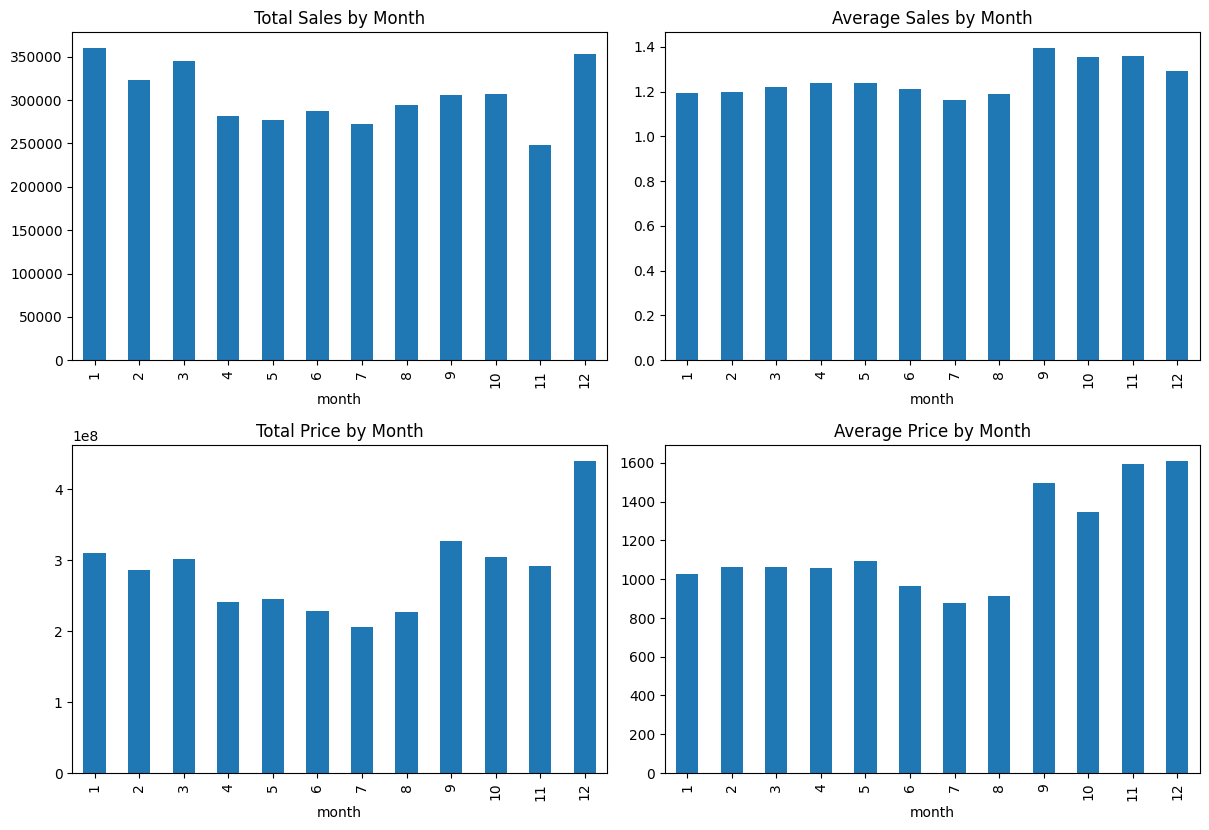

In [22]:
sum_item_count_month = sales.groupby(["month"])["item_cnt_day"].sum()
mean_item_count_month = sales.groupby(["month"])["item_cnt_day"].mean()
sum_item_pr_month = sales.groupby(["month"])["Total_Price"].sum()
mean_item_pr_month = sales.groupby(["month"])["Total_Price"].mean()

fig, ax  = plt.subplots(2, 2,figsize=(12,8))
fig.tight_layout(h_pad=4)

sum_item_count_month.plot(subplots=True,ax=ax[0,0],kind='bar')
ax[0,0].set_title('Total Sales by Month')

mean_item_count_month.plot(subplots=True,ax=ax[0,1],kind='bar')
ax[0,1].set_title('Average Sales by Month')

sum_item_pr_month.plot(subplots=True,ax=ax[1,0],kind='bar')
ax[1,0].set_title('Total Price by Month')

mean_item_pr_month.plot(subplots=True,ax=ax[1,1],kind='bar')
ax[1,1].set_title('Average Price by Month')

plt.show()

**Observations**

- In January, most items are sold. But on average, the number of items sold was in September. However, the height total and the average of the prices earned in December.


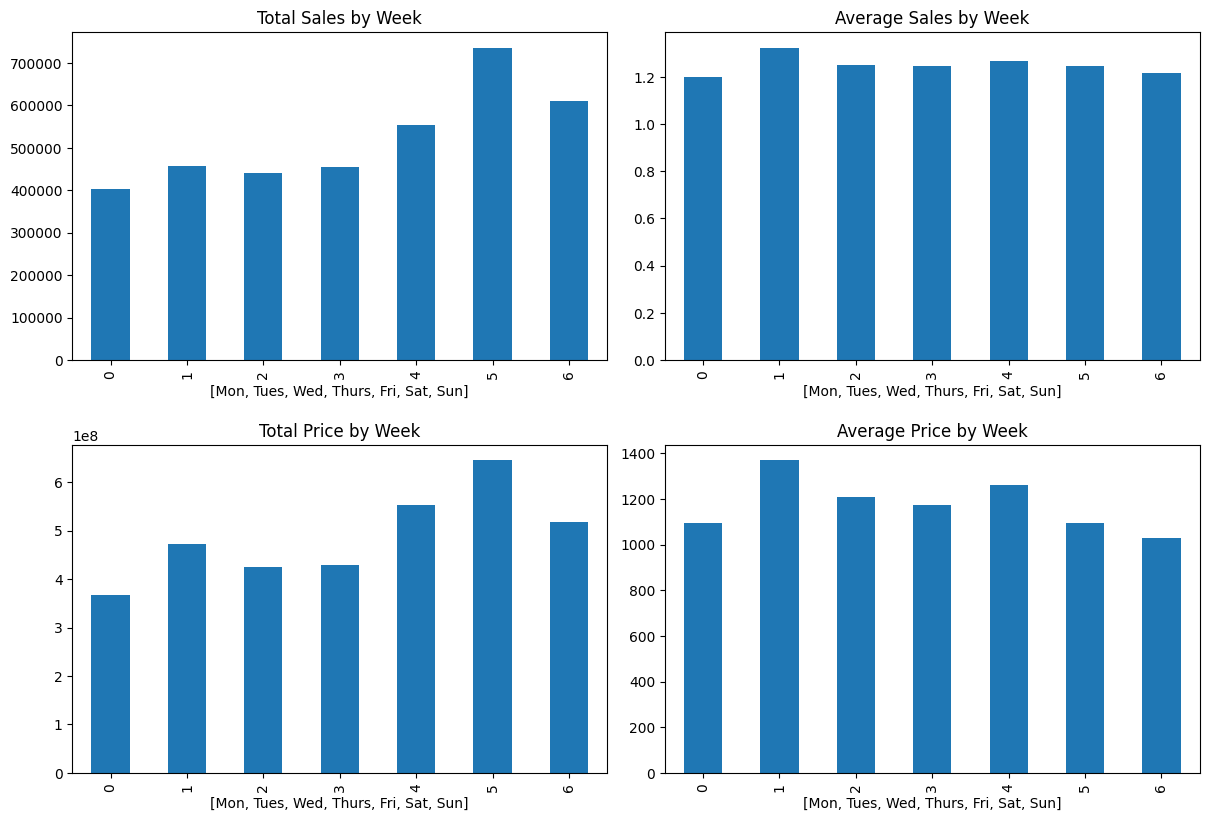

In [23]:
sum_item_count_weekday = sales.groupby(["weekday"])["item_cnt_day"].sum()
mean_item_count_weekday = sales.groupby(["weekday"])["item_cnt_day"].mean()
sum_item_pr_weekday = sales.groupby(["weekday"])["Total_Price"].sum()
mean_item_pr_weekday = sales.groupby(["weekday"])["Total_Price"].mean()

fig, ax  = plt.subplots(2, 2,figsize=(12,8))
fig.tight_layout(h_pad=4)
day_of_week = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]

sum_item_count_weekday.plot(subplots=True,ax=ax[0,0],kind='bar',xlabel = day_of_week)
ax[0,0].set_title('Total Sales by Week')

mean_item_count_weekday.plot(subplots=True,ax=ax[0,1],kind='bar',xlabel = day_of_week)
ax[0,1].set_title('Average Sales by Week')

sum_item_pr_weekday.plot(subplots=True,ax=ax[1,0],kind='bar',xlabel = day_of_week)
ax[1,0].set_title('Total Price by Week')

mean_item_pr_weekday.plot(subplots=True,ax=ax[1,1],kind='bar',xlabel = day_of_week)
ax[1,1].set_title('Average Price by Week')

plt.show()

**Observation**

- The total item sold and price earned were highest on Saturday

- The average item sold and price earned were highest on Tuesday


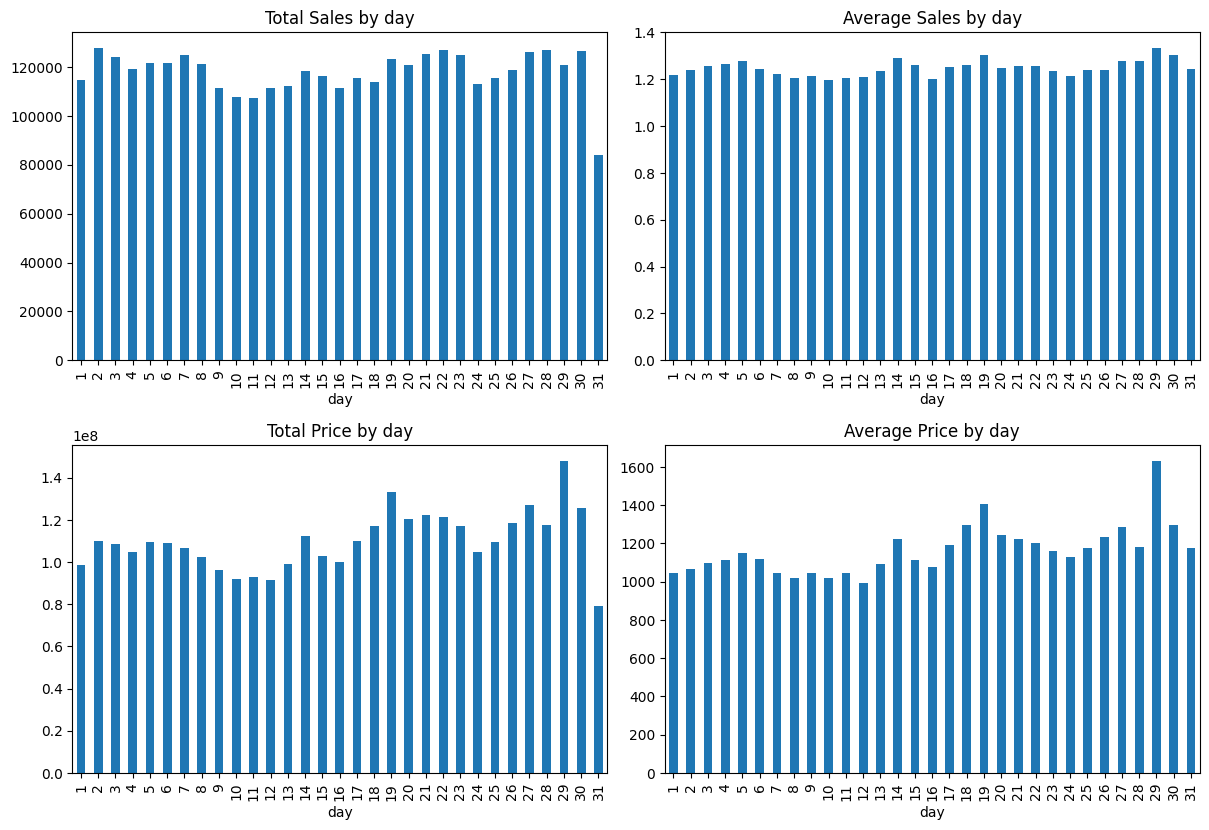

In [24]:
sum_item_count_day = sales.groupby(["day"])["item_cnt_day"].sum()
mean_item_count_day = sales.groupby(["day"])["item_cnt_day"].mean()
sum_item_pr_day = sales.groupby(["day"])["Total_Price"].sum()
mean_item_pr_day = sales.groupby(["day"])["Total_Price"].mean()

fig, ax  = plt.subplots(2, 2,figsize=(12,8))
fig.tight_layout(h_pad=4)

sum_item_count_day.plot(subplots=True,ax=ax[0,0],kind='bar')
ax[0,0].set_title('Total Sales by day')

mean_item_count_day.plot(subplots=True,ax=ax[0,1],kind='bar')
ax[0,1].set_title('Average Sales by day')

sum_item_pr_day.plot(subplots=True,ax=ax[1,0],kind='bar')
ax[1,0].set_title('Total Price by day')

mean_item_pr_day.plot(subplots=True,ax=ax[1,1],kind='bar')
ax[1,1].set_title('Average Price by day')

plt.show()

**Observations**

- The highest total and average price was earned on day 29th. 

- The total sale was highest on Day 2nd and day 29th but the average sale was highest on day 29th.

#***Category and Items***

In [38]:
top_item_sold = sales.groupby(["item_id"])["item_cnt_day"].sum()
top_item_sold = top_item_sold.reset_index()
top_item_sold = top_item_sold.sort_values(by='item_cnt_day',ascending=False)

top_item_sold = pd.merge(top_item_sold, items ,how='left', on='item_id') 
top_item_sold = pd.merge(top_item_sold, item_categories ,how='left', on='item_category_id') 

print("Top 10 sold items")
print(top_item_sold.head(10))


Top 10 sold items
   item_id  item_cnt_day                                          item_name  \
0    20949      187660.0  Фирменный пакет майка 1С Интерес белый (34*42)...   
1     2808       17255.0             Diablo III [PC, Jewel, русская версия]   
2     3732       16676.0         Grand Theft Auto V [PS3, русские субтитры]   
3    17717       15830.0               Прием денежных средств для 1С-Онлайн   
4     5822       14522.0  Playstation Store пополнение бумажника: Карта ...   
5     3734       11733.0    Grand Theft Auto V [Xbox 360, русские субтитры]   
6     6675       10315.0  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...   
7     3731       10105.0          Grand Theft Auto V [PC, русские субтитры]   
8     1855       10041.0                 Battlefield 4 [PC, русская версия]   
9    16787        9255.0                  Одни из нас [PS3, русская версия]   

   item_category_id                        item_category_name  
0                71  Подарки - Сумки, Альбомы, К

In [39]:
top_item_sold_by_cat = top_item_sold.groupby(["item_category_id"])["item_cnt_day"].sum()
top_item_sold_by_cat = top_item_sold_by_cat.reset_index()
top_item_sold_by_cat = top_item_sold_by_cat.sort_values(by='item_cnt_day',ascending=False)

top_item_sold_by_cat = pd.merge(top_item_sold_by_cat, item_categories ,how='left', on='item_category_id') 

print("Top 10 sold items")
print(top_item_sold_by_cat.head(10))


Top 10 sold items
   item_category_id  item_cnt_day                        item_category_name
0                40      634885.0                                Кино - DVD
1                30      457359.0             Игры PC - Стандартные издания
2                55      349050.0       Музыка - CD локального производства
3                19      255757.0                                Игры - PS3
4                37      204031.0                            Кино - Blu-Ray
5                71      188016.0  Подарки - Сумки, Альбомы, Коврики д/мыши
6                28      175227.0          Игры PC - Дополнительные издания
7                23      170577.0                           Игры - XBOX 360
8                20      127763.0                                Игры - PS4
9                65       73103.0    Подарки - Настольные игры (компактные)


In [41]:
top_item_sold_byPrice = sales.groupby(["item_id"])["Total_Price"].sum()
top_item_sold_byPrice = top_item_sold_byPrice.reset_index()
top_item_sold_byPrice = top_item_sold_byPrice.sort_values(by='Total_Price',ascending=False)

top_item_sold_byPrice = pd.merge(top_item_sold_byPrice, items ,how='left', on='item_id') 
top_item_sold_byPrice = pd.merge(top_item_sold_byPrice, item_categories ,how='left', on='item_category_id') 

print("Top 10 sold items by Price")
print(top_item_sold_byPrice.head(10))

Top 10 sold items by Price
   item_id   Total_Price                                          item_name  \
0     6675  2.199861e+08  Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...   
1     3732  4.370690e+07         Grand Theft Auto V [PS3, русские субтитры]   
2    13443  3.438623e+07  Комплект Sony PS4 (500 Gb) Black (CUH-1108A/B0...   
3     3734  3.118972e+07    Grand Theft Auto V [Xbox 360, русские субтитры]   
4     3733  2.236881e+07         Grand Theft Auto V [PS4, русские субтитры]   
5    16787  2.197261e+07                  Одни из нас [PS3, русская версия]   
6     3731  1.999558e+07          Grand Theft Auto V [PC, русские субтитры]   
7    13405  1.818258e+07  Комплект "Microsoft Xbox One 500GB (Day One Ed...   
8    17717  1.720083e+07               Прием денежных средств для 1С-Онлайн   
9     5823  1.715445e+07  Playstation Store пополнение бумажника: Карта ...   

   item_category_id             item_category_name  
0                12          Игровые консоли - PS4

In [67]:
top_item_sold_by_cat_byprice = top_item_sold_byPrice.groupby(["item_category_id"])["Total_Price"].sum()
top_item_sold_by_cat_byprice = top_item_sold_by_cat_byprice.reset_index()
top_item_sold_by_cat_byprice = top_item_sold_by_cat_byprice.sort_values(by='Total_Price',ascending=False)

top_item_sold_by_cat_byprice = pd.merge(top_item_sold_by_cat_byprice, item_categories ,how='left', on='item_category_id') 

print("Top 10 sold items")
print(top_item_sold_by_cat_byprice.head(10))


Top 10 sold items
   item_category_id   Total_Price                   item_category_name
0                19  4.135049e+08                           Игры - PS3
1                20  3.743002e+08                           Игры - PS4
2                12  2.930917e+08                Игровые консоли - PS4
3                23  2.606500e+08                      Игры - XBOX 360
4                30  2.579593e+08        Игры PC - Стандартные издания
5                40  1.701256e+08                           Кино - DVD
6                28  1.366278e+08     Игры PC - Дополнительные издания
7                55  1.001632e+08  Музыка - CD локального производства
8                37  9.080841e+07                       Кино - Blu-Ray
9                75  8.742161e+07         Программы - Для дома и офиса


**Observations**

- Gaming consoles are the item category with the most total price earned. 

- The most sold item is *Фирменный пакет майка 1С Интерес белый (34\*42)*, which is *Corporate package T-shirt 1C Interest white*.

- The next most sold items are DVD, PC, Blu ray. 

<Axes: title={'center': 'Distribution of the sale of PlayStation 4'}, xlabel='date_block_num', ylabel='Total Price earned'>

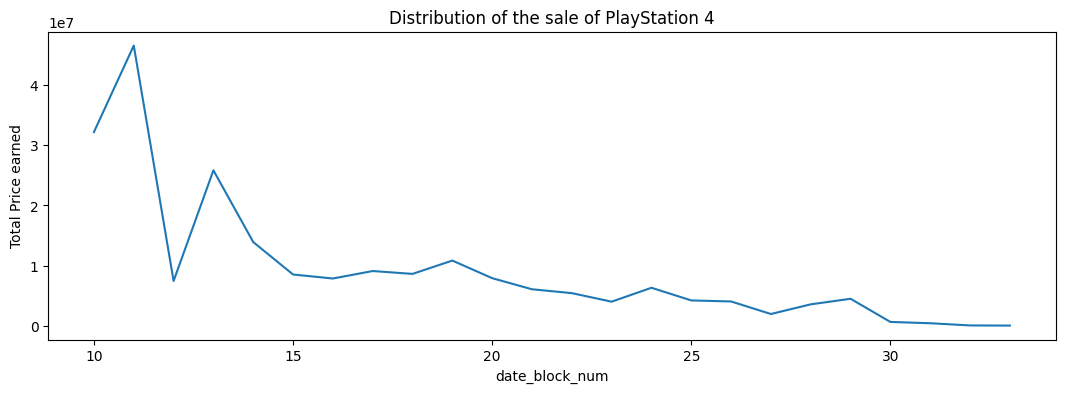

In [59]:
item_winner_by_price = sales[sales.item_id==6675]
item_winner_by_price = item_winner_by_price.groupby(["date_block_num"])["Total_Price"].sum()


fig, ax = plt.subplots(figsize=(13,4))
plt.title('Distribution of the sale of PlayStation 4')
plt.xlabel('month')
plt.ylabel('Total Price earned')
item_winner_by_price.plot()





<Axes: title={'center': 'Distribution of the sale for White Tshirt'}, xlabel='date_block_num', ylabel='Total sales'>

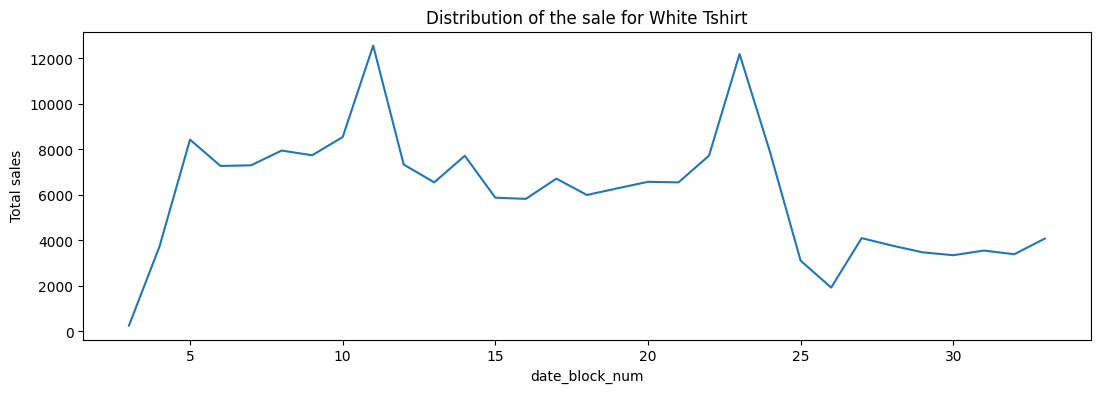

In [51]:
item_winner_by_count = sales[sales.item_id==20949]
item_winner_by_count = item_winner_by_count.groupby(["date_block_num"])["item_cnt_day"].sum()


fig, ax = plt.subplots(figsize=(13,4))
plt.title('Distribution of the sale for White Tshirt')
plt.xlabel('month')
plt.ylabel('Total sales')
item_winner_by_count.plot()

**Observations:**

- The most sold item (white shirt) has good amount of sale over time

- However, the most earned item, playstation 4 was sold mostly on 2013 and then decreasing amount of sales over time 


                  item_category_id  item_cnt_day_x  \
item_category_id                                     
40                              40        331230.0   
30                              30        235655.0   
55                              55        155136.0   
19                              19        134813.0   
37                              37         86898.0   

                                   item_category_name  item_cnt_day_y  \
item_category_id                                                        
40                                         Кино - DVD        201789.0   
30                      Игры PC - Стандартные издания        146702.0   
55                Музыка - CD локального производства        124866.0   
19                                         Игры - PS3         82523.0   
37                                     Кино - Blu-Ray         75627.0   

                  item_cnt_day  
item_category_id                
40                    101866.0  
30        

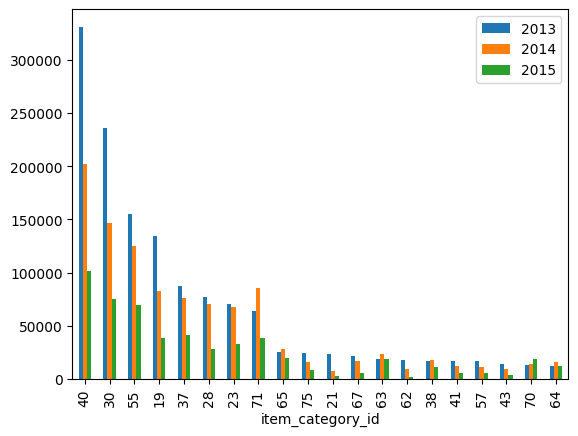

In [106]:
top_item_sold2013 = item_count_year2013.groupby(["item_id"])["item_cnt_day"].sum()
top_item_sold2013 = top_item_sold2013.reset_index()
top_item_sold2013 = top_item_sold2013.sort_values(by='item_cnt_day',ascending=False)

top_item_sold2013 = pd.merge(top_item_sold2013, items ,how='left', on='item_id') 
top_item_sold2013 = pd.merge(top_item_sold2013, item_categories ,how='left', on='item_category_id') 

top_item_sold_by_cat2013 = top_item_sold2013.groupby(["item_category_id"])["item_cnt_day"].sum()
top_item_sold_by_cat2013 = top_item_sold_by_cat2013.reset_index()
top_item_sold_by_cat2013 = top_item_sold_by_cat2013.sort_values(by='item_cnt_day',ascending=False)

top_item_sold_by_cat2013 = pd.merge(top_item_sold_by_cat2013, item_categories ,how='left', on='item_category_id') 

#2014
top_item_sold2014 = item_count_year2014.groupby(["item_id"])["item_cnt_day"].sum()
top_item_sold2014 = top_item_sold2014.reset_index()
top_item_sold2014 = top_item_sold2014.sort_values(by='item_cnt_day',ascending=False)

top_item_sold2014 = pd.merge(top_item_sold2014, items ,how='left', on='item_id') 
top_item_sold2014 = pd.merge(top_item_sold2014, item_categories ,how='left', on='item_category_id') 

top_item_sold_by_cat2014 = top_item_sold2014.groupby(["item_category_id"])["item_cnt_day"].sum()
top_item_sold_by_cat2014 = top_item_sold_by_cat2014.reset_index()
top_item_sold_by_cat2014 = top_item_sold_by_cat2014.sort_values(by='item_cnt_day',ascending=False)

top_item_sold_by_cat2014 = pd.merge(top_item_sold_by_cat2014, item_categories ,how='left', on='item_category_id') 

#2015
top_item_sold2015 = item_count_year2015.groupby(["item_id"])["item_cnt_day"].sum()
top_item_sold2015 = top_item_sold2015.reset_index()
top_item_sold2015 = top_item_sold2015.sort_values(by='item_cnt_day',ascending=False)

top_item_sold2015 = pd.merge(top_item_sold2015, items ,how='left', on='item_id') 
top_item_sold2015 = pd.merge(top_item_sold2015, item_categories ,how='left', on='item_category_id') 

top_item_sold_by_cat2015 = top_item_sold2015.groupby(["item_category_id"])["item_cnt_day"].sum()
top_item_sold_by_cat2015 = top_item_sold_by_cat2015.reset_index()
top_item_sold_by_cat2015 = top_item_sold_by_cat2015.sort_values(by='item_cnt_day',ascending=False)

top_item_sold_by_cat2015 = pd.merge(top_item_sold_by_cat2015, item_categories ,how='left', on='item_category_id') 

x = pd.merge(top_item_sold_by_cat2013,top_item_sold_by_cat2014,how='left',on=['item_category_id','item_category_name'])
x = pd.merge(x,top_item_sold_by_cat2015,how='left',on=['item_category_id','item_category_name'])

x.index = x.item_category_id
x = x[:20]

fig, ax = plt.subplots()
x.plot(y = ['item_cnt_day_x','item_cnt_day_y','item_cnt_day'], kind='bar',ax=ax)
ax.legend(["2013", "2014","2015"])

print(x.head(5))
print(top_item_sold_by_cat2013.head(5))
print(top_item_sold_by_cat2014.head(5))
print(top_item_sold_by_cat2015.head(5))



**Observations:**

Looks like the top three categories (DVD, PC, CD) which have the most items sold are same for the year 2013, 2014 and 2015. However, total sales for those categories are decreasing over time. 


# ***Shop Data***

In [109]:
top_item_sold_shop = sales.groupby(["shop_id"])["item_cnt_day"].sum()
top_item_sold_shop = top_item_sold_shop.reset_index()
top_item_sold_shop = top_item_sold_shop.sort_values(by='item_cnt_day',ascending=False)

top_item_sold_shop = pd.merge(top_item_sold_shop, shops ,how='left', on='shop_id') 

print("Top 10 shop that sold most items")
print(top_item_sold_shop.head(10))

Top 10 shop that sold most items
   shop_id  item_cnt_day                        shop_name
0       31      311230.0          Москва ТЦ "Семеновский"
1       25      242237.0              Москва ТРК "Атриум"
2       54      186149.0                  Химки ТЦ "Мега"
3       28      184777.0  Москва ТЦ "МЕГА Теплый Стан" II
4       42      145195.0           СПб ТК "Невский Центр"
5       57      141424.0          Якутск Орджоникидзе, 56
6       27      136815.0   Москва ТЦ "МЕГА Белая Дача II"
7        6      100757.0       Воронеж (Плехановская, 13)
8       58       81908.0          Якутск ТЦ "Центральный"
9       46       79092.0            Сергиев Посад ТЦ "7Я"


In [110]:
top_item_sold_byPrice_shop = sales.groupby(["shop_id"])["Total_Price"].sum()
top_item_sold_byPrice_shop = top_item_sold_byPrice_shop.reset_index()
top_item_sold_byPrice_shop = top_item_sold_byPrice_shop.sort_values(by='Total_Price',ascending=False)

top_item_sold_byPrice_shop = pd.merge(top_item_sold_byPrice_shop, shops ,how='left', on='shop_id') 

print("Top 10 shop that earned the most")
print(top_item_sold_byPrice_shop.head(10))

Top 10 shop that earned the most
   shop_id   Total_Price                        shop_name
0       31  2.356611e+08          Москва ТЦ "Семеновский"
1       25  2.169676e+08              Москва ТРК "Атриум"
2       28  1.601296e+08  Москва ТЦ "МЕГА Теплый Стан" II
3       42  1.522791e+08           СПб ТК "Невский Центр"
4       54  1.424218e+08                  Химки ТЦ "Мега"
5       27  1.408849e+08   Москва ТЦ "МЕГА Белая Дача II"
6       57  1.133351e+08          Якутск Орджоникидзе, 56
7       12  1.131852e+08              Интернет-магазин ЧС
8        6  9.847755e+07       Воронеж (Плехановская, 13)
9       18  8.366872e+07             Красноярск ТЦ "Июнь"


# ***Sales patterns***

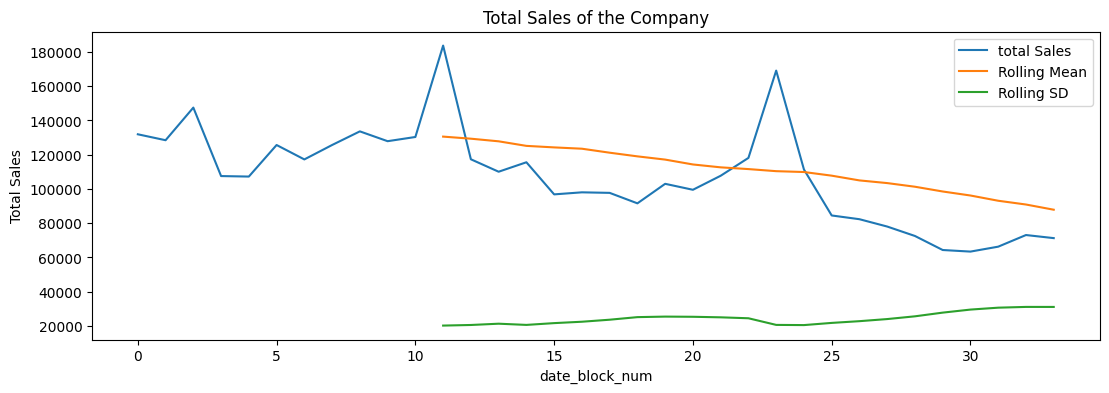

In [111]:
#rolling avg
allmonths_sum_item_count =sales.groupby(["date_block_num"])["item_cnt_day"].sum()
rolling_mean = allmonths_sum_item_count.rolling(window=12,center=False).mean()
rolling_SD = allmonths_sum_item_count.rolling(window=12,center=False).std()

fig, ax = plt.subplots(figsize=(13,4))
plt.title('Total Sales of the Company')
plt.xlabel('Month')
plt.ylabel('Total Sales')

allmonths_sum_item_count.plot(ax=ax,label='total Sales')
rolling_mean.plot(ax=ax,label='Rolling Mean')
rolling_SD.plot(ax=ax,label='Rolling SD')
plt.legend()


**Observations**

- There is a decrease in trend in the sales data.


Text(0.5, 1.0, 'Cumulative item sold')

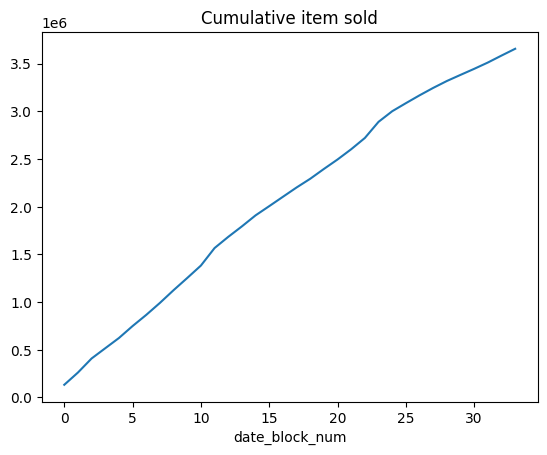

In [116]:
allmonths_sum_item_count_cm = allmonths_sum_item_count.cumsum()
allmonths_sum_item_count_cm.plot()
plt.title('Cumulative item sold')

Text(0.5, 1.0, 'Cumulative total price earned')

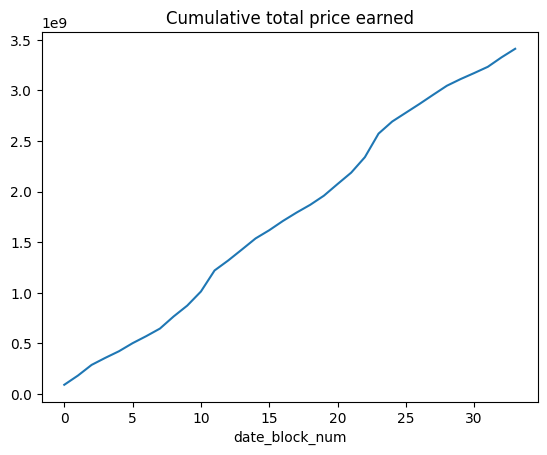

In [115]:
allmonths_total_price =sales.groupby(["date_block_num"])["Total_Price"].sum()
allmonths_total_price_cm = allmonths_total_price.cumsum()
allmonths_total_price_cm.plot()
plt.title('Cumulative total price earned')

**Observations**

- The cumulative sum for both total sold items and price earned are positive and the sum is steadily increase. This indicates that the values are above average.